## 数据预处理和可视化

In [74]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [75]:
sns.set(font_scale = .8, font="Hiragino Sans GB", style = 'white')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

params = {
            'figure.dpi':150,
            'font.style': 'normal',
            'font.size': 12,
            'figure.figsize': [6,3],
            'lines.linewidth': .7,
            'axes.linewidth': 1,
        }
plt.rcParams.update(params)

color_1 = ['#C0EEE4', '#F8F988', '#FAAB78', '#FFDCA9', '#FCF9BE', '#E8F3D6', '#FEFCF3']
color_2 = ['#001d57', '#003b72', '#005883', '#00758d', '#199092', '#5fab97', '#95c4a0']
color_3 = ['#E1FFB1', '#C7F2A4', '#B6E388', '#FCFFB2', '#FFDCA9', '#D8CCA3', '#FAAB78']
sns.color_palette(color_1)

[(0.7529411764705882, 0.9333333333333333, 0.8941176470588236),
 (0.9725490196078431, 0.9764705882352941, 0.5333333333333333),
 (0.9803921568627451, 0.6705882352941176, 0.47058823529411764),
 (1.0, 0.8627450980392157, 0.6627450980392157),
 (0.9882352941176471, 0.9764705882352941, 0.7450980392156863),
 (0.9098039215686274, 0.9529411764705882, 0.8392156862745098),
 (0.996078431372549, 0.9882352941176471, 0.9529411764705882)]

In [76]:
raw_data = pd.read_excel("./行车记录仪.xlsx")
raw_data.rename(columns={'品名':'name','价格':'price','品牌':'brand','评论数':'comment','尺码':'type','商品产地':'location',
                         '操作方式':'operation_mode','屏幕尺寸':'screen_size','拍摄角度':'angle','功能':'function',
                         '安装方式':'install_mode','分辨率':'image_resolution','商品毛重':'weight'}, inplace=True)

In [77]:
# 删去无用属性: name, type
raw_data.drop(columns=['name', 'type'],inplace=True)

In [78]:
# 处理comment得到值
import re
def process_comment(comment):
    pattern = r"\d+"
    if pd.isnull(comment):
        return np.nan
    return re.findall(pattern,comment)[0]
raw_data['comment'] = raw_data['comment'].apply(process_comment)

In [79]:
# 处理weight
def process_weight(weight):
    import re
    if pd.isnull(weight):
        return np.nan
    pat_kg = re.compile(r"kg",re.I)
    if len(re.findall(pattern=pat_kg, string=weight)) == 1:
        return (float)(weight[:-2]) * 1000
    else:
        return (float)(weight[:-1])
raw_data['weight'] = raw_data['weight'].apply(process_weight)

In [80]:
raw_data.head(5)

,price,comment,brand,location,operation_mode,screen_size,angle,function,image_resolution,install_mode,weight
0,279.0,4200,小蚁（yi）,中国大陆,按键,2.7英寸,150°-169°,夜视加强,1296P,通用单镜头,74.0
1,349.0,3500,米家（MIJIA）,中国大陆,按键,3.0英寸,150°-169°,夜视加强,1080p,通用单镜头,366.0
2,329.0,20000,PAPAGO！,中国大陆,按键,2.0英寸,170°及以上,停车监控,1296P,通用单镜头,400.0
3,199.0,9700,小蚁（yi）,中国大陆,按键,2.7英寸,120°-149°,夜视加强,1080p,通用单镜头,280.0
4,NaN,4100,凌度,NaN,按键,7英寸,120°-149°,停车监控,1080p,通用双镜头,1000.0


### 重复值去除

In [81]:
length_before = len(raw_data)
raw_data.drop_duplicates(inplace=True)
length_after = len(raw_data)
print(f"length before drop duplicate: {length_before}")
print(f"length after drop duplicate: {length_after}")

length before drop duplicate: 1800
length after drop duplicate: 1305


### 缺失值处理

<AxesSubplot:>

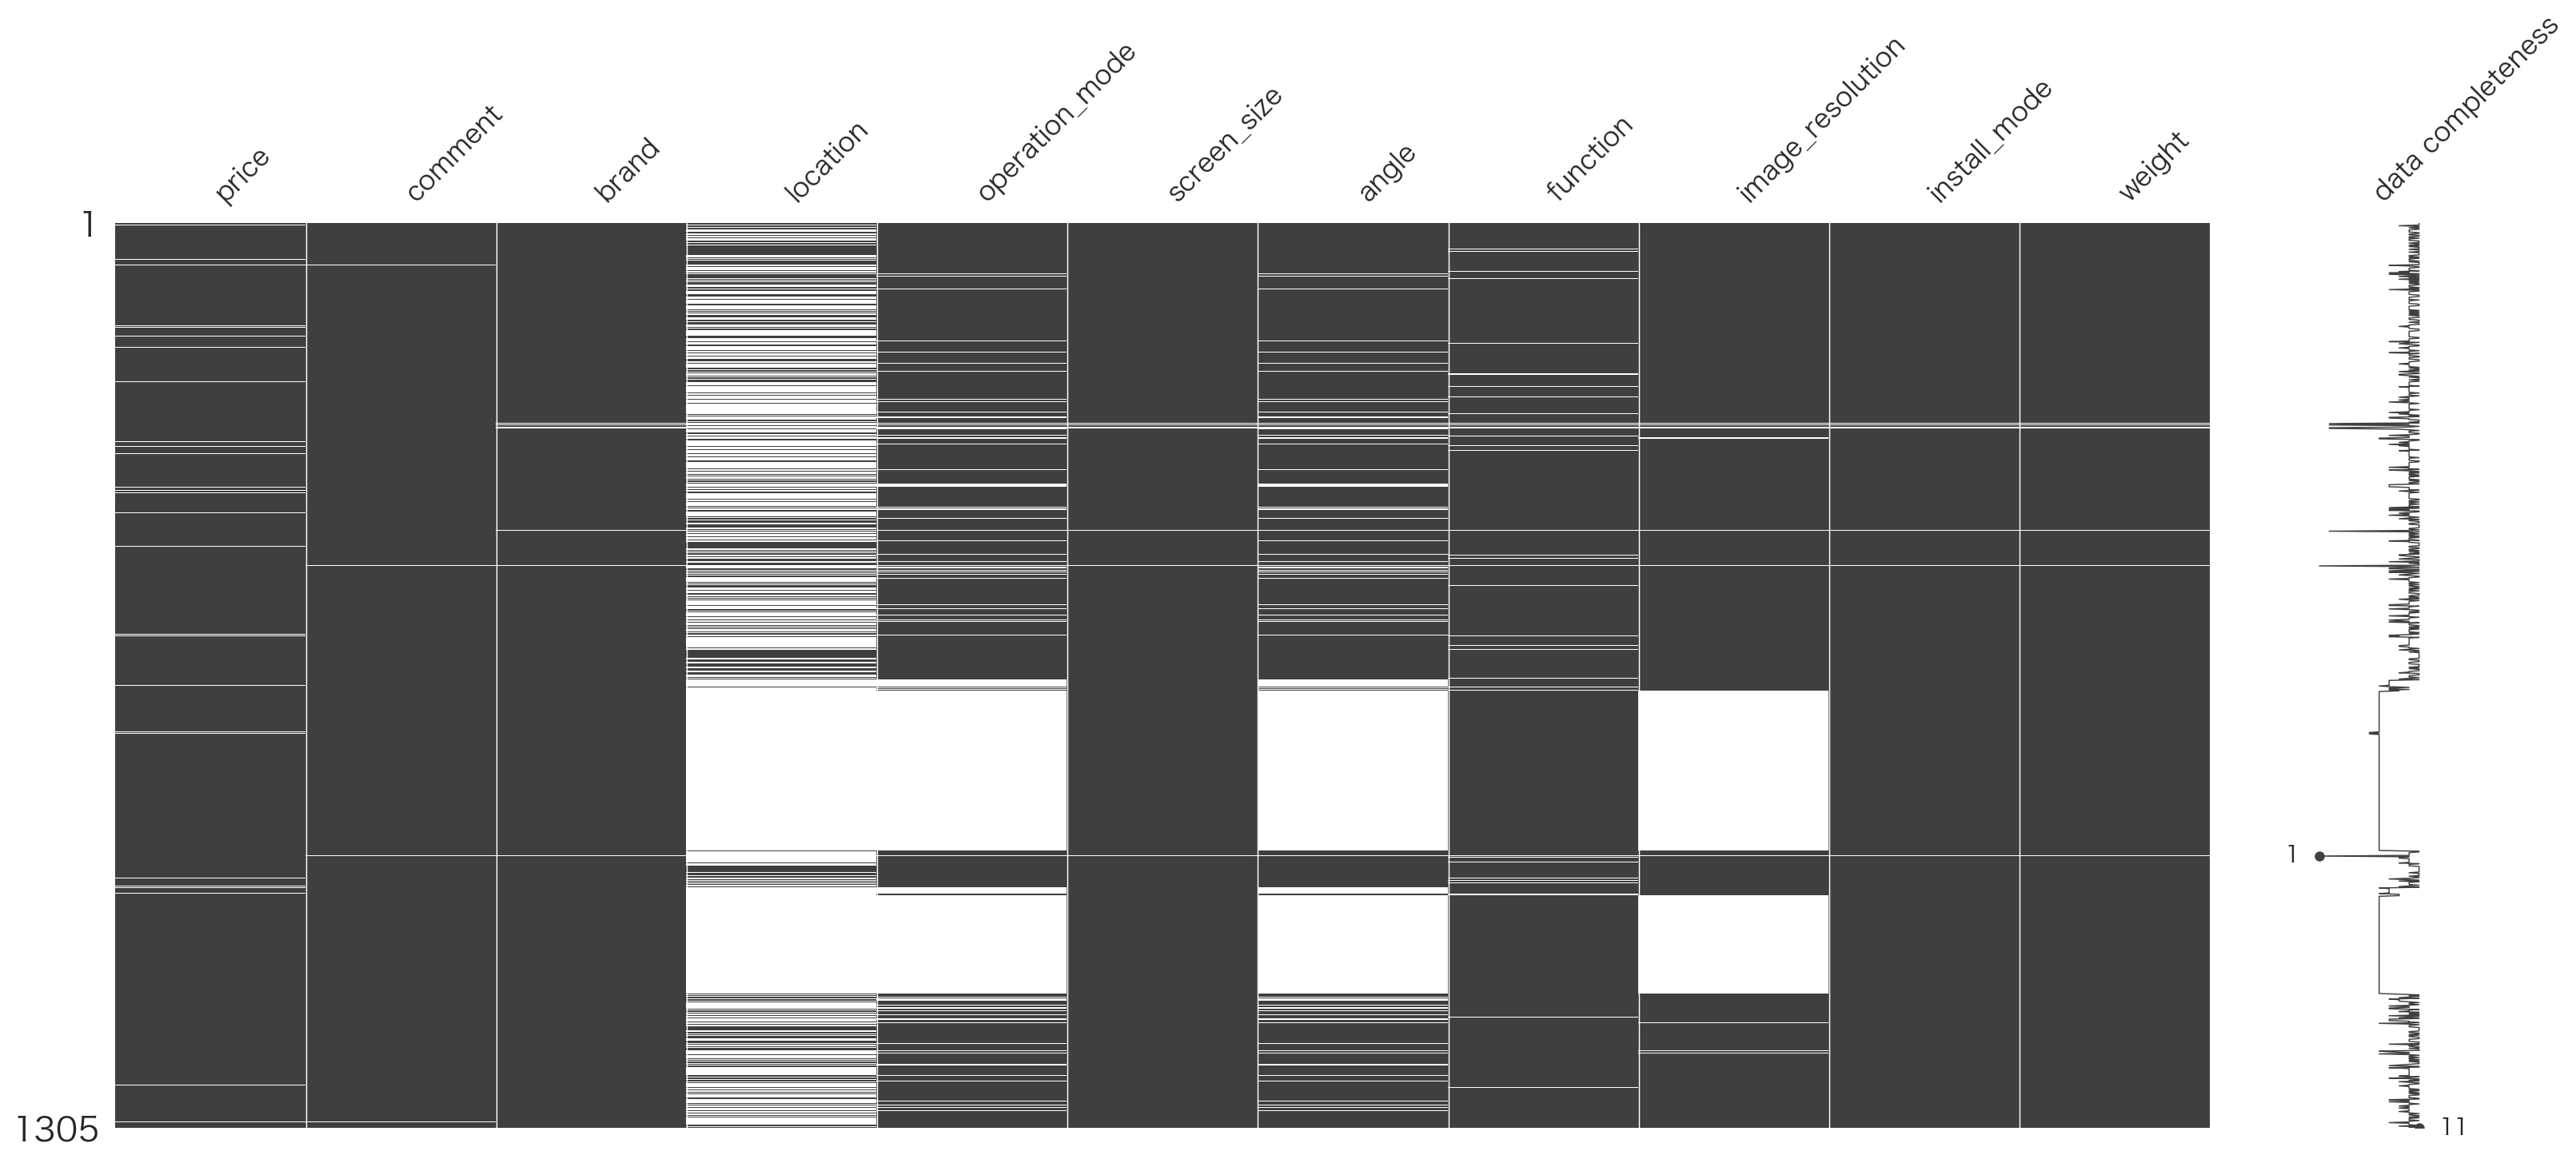

In [82]:
import missingno as msno
msno.matrix(raw_data, labels=True)

<AxesSubplot:>

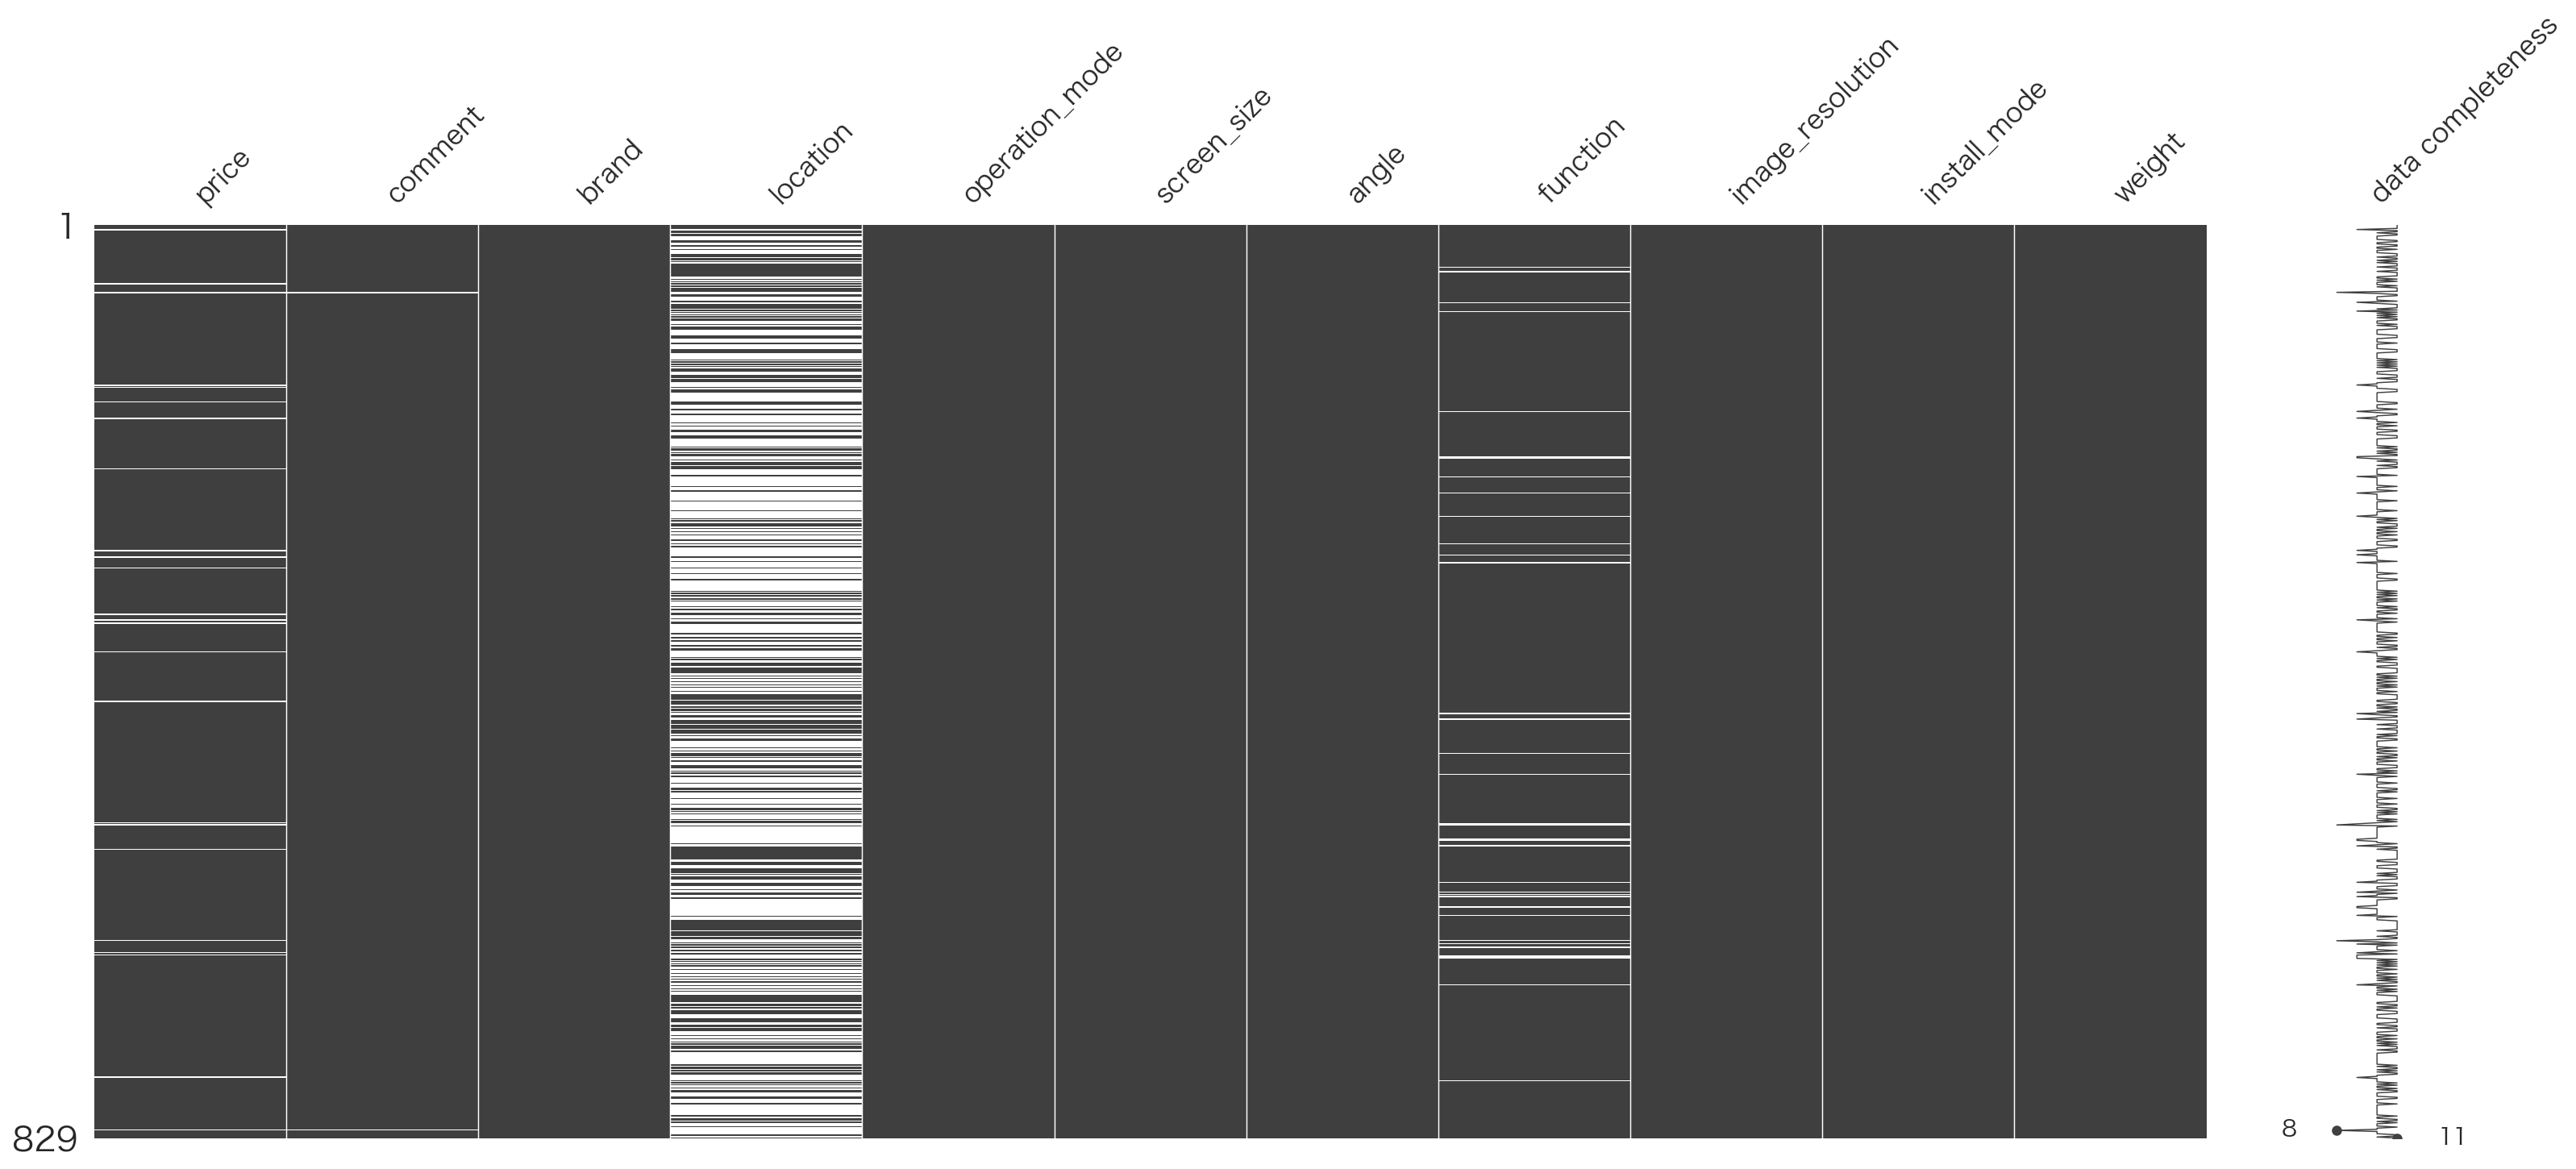

In [83]:
raw_data.dropna(subset=['operation_mode','angle'],axis=0,how='all',inplace=True)
msno.matrix(raw_data, labels=True)

In [84]:
raw_data['location'].value_counts(dropna=False).keys()
raw_data['location'].value_counts(dropna=False).values

array([488, 339,   1,   1])

Text(0.5, 1.0, 'location取值统计图')

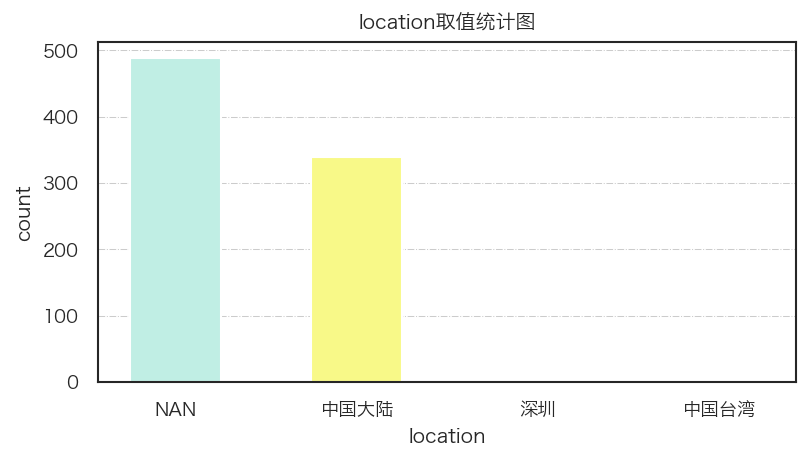

In [85]:
location_series = raw_data['location'].value_counts(dropna=False)
x = location_series.keys().to_list()
x[0] = "NAN"
y = location_series.values
plt.grid(linestyle='-.', axis='y', linewidth=.5)
plt.bar(x,y,color = color_1,width=0.5)
plt.xlabel('location')
plt.ylabel('count')
plt.title('location取值统计图')

In [86]:
# 删除location属性
raw_data.drop(columns=['location'],inplace=True)

### price属性处理

In [87]:
raw_price = raw_data['price']
print(f"data number before dropna: {raw_price.shape[0]}")
exist_price = raw_price.dropna()
print(f"data number after dropna: {exist_price.shape[0]}")
print(f"{raw_price.shape[0] - exist_price.shape[0]} data need process")

data number before dropna: 829
data number after dropna: 805
24 data need process


Text(0.5, 1.0, '取对数后的price的数据分布')

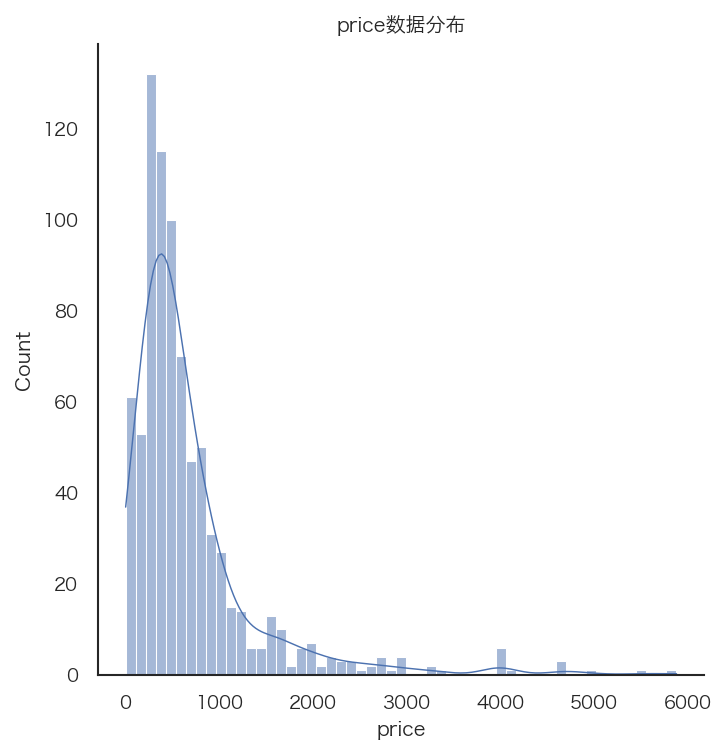

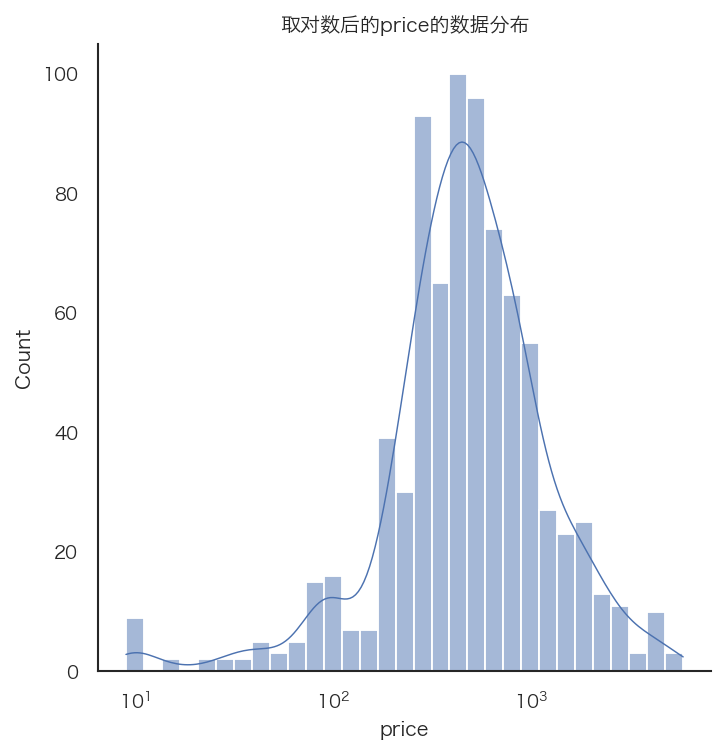

In [88]:
sns.displot(exist_price,kde = True, log_scale=False)
plt.title("price数据分布")
sns.displot(exist_price,kde = True, log_scale=True)
plt.title("取对数后的price的数据分布")

In [89]:
import math
def price_log(price):
    if pd.isnull(price):
        return np.nan
    return math.log(price,10)
raw_price = raw_price.apply(price_log)

In [90]:
# 用众数填充空值
raw_price.fillna(value=raw_price.mode().values[0],inplace=True)
# 保存数值值
log_price = raw_price.copy(deep=True)
raw_data['original_price'] = log_price

In [91]:
# 使用K-Means算法离散化price属性
from sklearn.cluster import KMeans

def KmeanCut(data, k):
    kmodel = KMeans(n_clusters=k)
    kmodel.fit(np.array(data).reshape(len(data),1))
    c = pd.DataFrame(kmodel.cluster_centers_, columns=list('a')).sort_values(by='a')    
    w = c.rolling(2).mean().iloc[1:]
    w = [0] + list(w['a']) + [data.max()]
    data = pd.cut(data, w, labels=range(k))
    data = data.apply(lambda x : (int)(x))
    return data

In [92]:
raw_price = KmeanCut(raw_price, 4)
raw_data['price'] = raw_price

Text(0, 0.5, 'count')

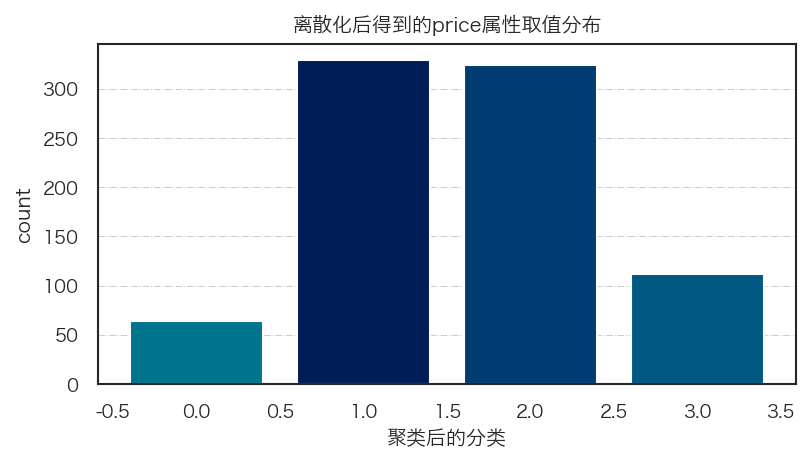

In [93]:
plt.bar(raw_price.value_counts().keys(),raw_price.value_counts().values,color = color_2)
plt.title("离散化后得到的price属性取值分布")
plt.xlabel("聚类后的分类")
plt.grid(linestyle='-.', axis='y', linewidth=.5)
plt.ylabel("count")

### comment标签处理

In [94]:
# 填充空值为0
raw_data['comment'].fillna("0",inplace=True)
# 转换为int类型
raw_data['comment'] = raw_data['comment'].apply(lambda x : (int)(x))

In [95]:
# 保存初始值
raw_data['original_comment'] = raw_data['comment']

Text(0.5, 1.0, 'comment数据分布')

<Figure size 1800x600 with 0 Axes>

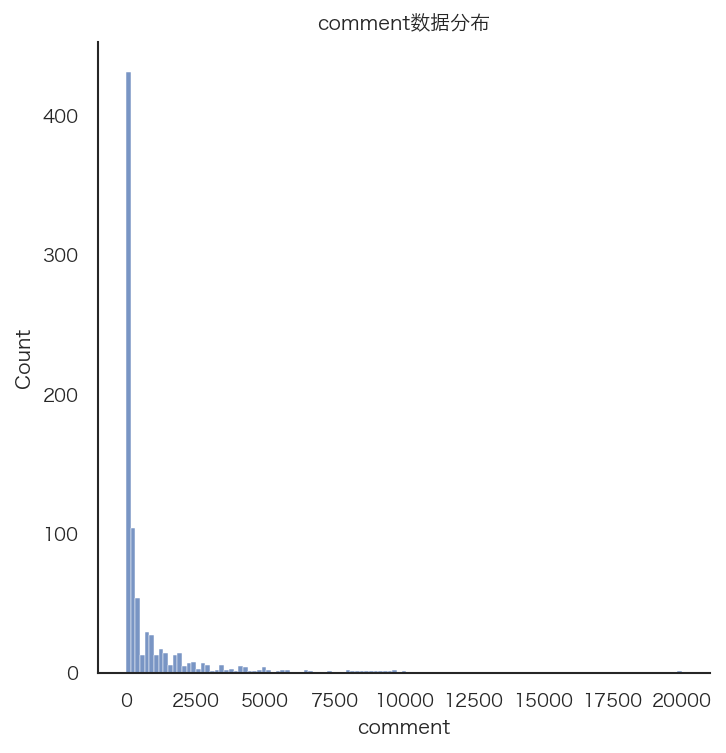

In [96]:
plt.figure(figsize=(12,4))
sns.displot(raw_data['comment'])
plt.title("comment数据分布")

Text(0.5, 1.0, 'comment的对数数据分布')

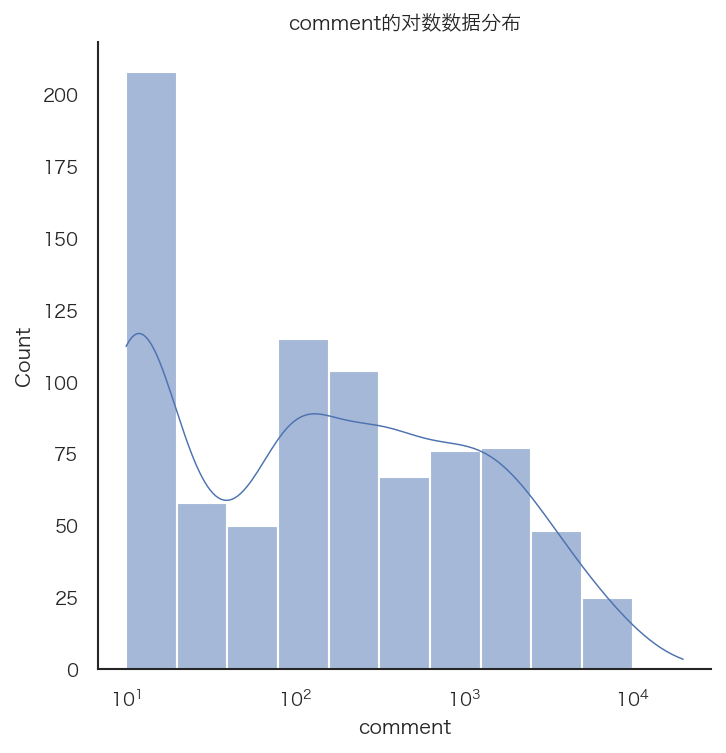

In [97]:
raw_data['comment'] = raw_data['comment'].apply(lambda x : x + 10)
sns.displot(raw_data['comment'], kde = True, log_scale=True)
plt.title("comment的对数数据分布")

In [98]:
# 将comment离散化
raw_data['comment'] = KmeanCut(raw_data['comment'], 3)

Text(0, 0.5, 'count')

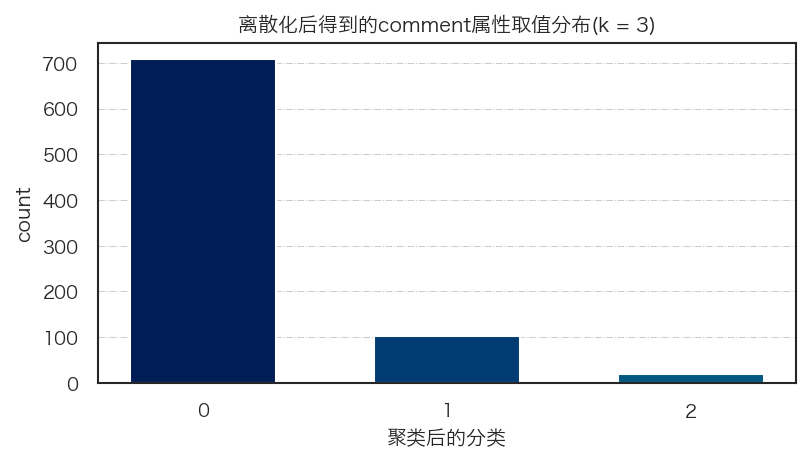

In [99]:
plt.bar(raw_data['comment'].value_counts().keys(),raw_data['comment'].value_counts().values,color = color_2, width=0.6)
plt.title("离散化后得到的comment属性取值分布(k = 3)")
plt.xticks(raw_data['comment'].value_counts().keys())
plt.xlabel("聚类后的分类")
plt.grid(linestyle='-.', axis='y', linewidth=.5)
plt.ylabel("count")

### 品牌属性处理

In [100]:
brand = raw_data['brand']
brand.fillna("其他", inplace=True)

In [101]:
print(f"不同的品牌个数为: {len(brand.unique())}")

不同的品牌个数为: 168


In [102]:
brand_reserve = []
for index, row in raw_data.iterrows():
    if (row['price'] >= 4):
        brand_reserve.append(row['brand'])
brand_reserve = np.unique((np.array(brand_reserve)))
print(brand_reserve)

[]


In [103]:
# 丢弃brand属性
raw_data.drop(columns=['brand'], inplace=True)

### 操作方式属性处理

In [104]:
# 填补缺失值
raw_data['operation_mode'].fillna(raw_data['operation_mode'].mode(),inplace=True)

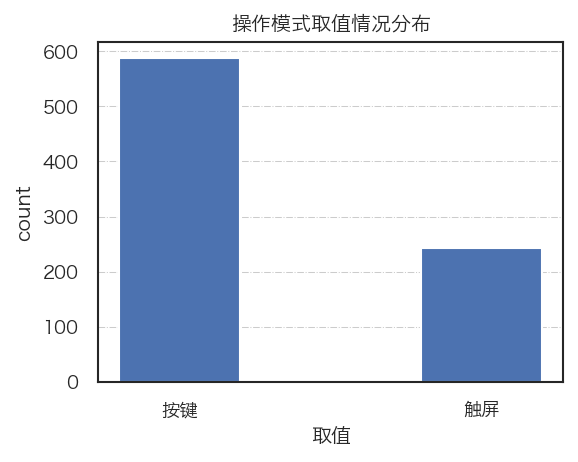

In [105]:
plt.figure(figsize=(4,3))
plt.bar(raw_data['operation_mode'].value_counts().keys(),
        raw_data['operation_mode'].value_counts().values,
        width= 0.4)
plt.title("操作模式取值情况分布")
plt.xlabel("取值")
plt.ylabel("count")
plt.grid(linestyle='-.', axis='y', linewidth=.5)

In [106]:
raw_data['operation_mode'] = raw_data['operation_mode'].factorize()[0]

In [107]:
raw_data.head(10)

,price,comment,operation_mode,screen_size,angle,function,image_resolution,install_mode,weight,original_price,original_comment
0,1,1,0,2.7英寸,150°-169°,夜视加强,1296P,通用单镜头,74.0,2.445604,4200
1,1,1,0,3.0英寸,150°-169°,夜视加强,1080p,通用单镜头,366.0,2.542825,3500
2,1,2,0,2.0英寸,170°及以上,停车监控,1296P,通用单镜头,400.0,2.517196,20000
3,1,2,0,2.7英寸,120°-149°,夜视加强,1080p,通用单镜头,280.0,2.298853,9700
4,1,1,0,7英寸,120°-149°,停车监控,1080p,通用双镜头,1000.0,2.475671,4100
5,1,2,0,7英寸,120°-149°,前后双录,1080p,通用双镜头,1000.0,2.600973,10000
6,1,0,0,4.3英寸,120°-149°,夜视加强,1080p,通用双镜头,740.0,2.298853,0
7,2,1,0,无屏幕,170°及以上,夜视加强,1080p,专车专用双镜头,500.0,2.670246,1900
8,3,1,1,8英寸及以上,150°-169°,语音交互，WIFI，轨道偏离预警，倒车影像，GPS，上网，智能导航,1080p,通用单镜头,756.0,3.113609,3000
9,2,1,0,2.0英寸,120°-149°,夜视加强,1080p,通用单镜头,280.0,2.698101,2200


### 屏幕尺寸属性处理

In [108]:
# 空值填充
raw_data['screen_size'].fillna("无屏幕",inplace=True)

In [109]:
# 字符串处理
def screen_size_process(size):
    import re
    if size == "无屏幕":
        return .0
    pat = r"([\.\d]+)英寸"
    return (float)(re.findall(pattern=pat,string=size)[0])

raw_data['screen_size'] = raw_data['screen_size'].apply(screen_size_process)

Text(0.5, 1.0, '各种屏幕大小的屏幕分布')

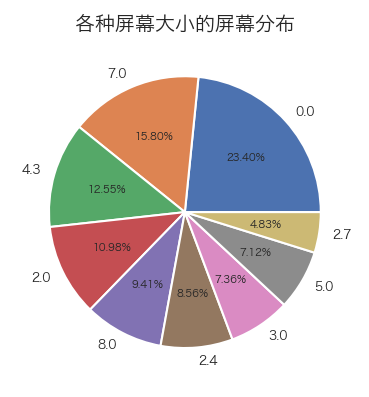

In [110]:
patches,l_text,p_text = plt.pie(raw_data['screen_size'].value_counts().values,
                            labels=raw_data['screen_size'].value_counts().keys(),
                            autopct='%.2f%%')
for t in p_text:
    t.set_size(5)

for t in l_text:
    t.set_size(6)

plt.title("各种屏幕大小的屏幕分布")

In [111]:
screen_size_map = {0.0 : 0, 2.0 : 1, 2.4 : 2, 2.7 : 3, 3.0 : 4, 4.3 : 5,
                   5.0 : 6, 7.0 : 7, 8.0 : 8}
raw_data['screen_size'] = raw_data['screen_size'].map(screen_size_map)

### 拍摄角度属性处理

In [112]:
# 使用众数填充空缺值
raw_data['angle'].fillna(raw_data['angle'].mode(),inplace=True)

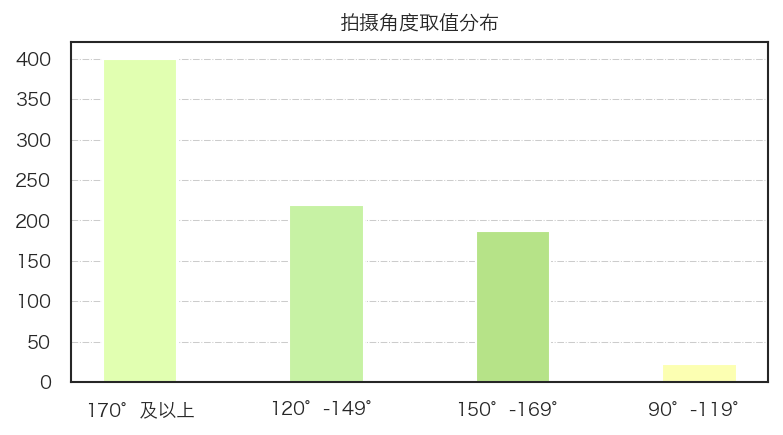

In [113]:
plt.bar(raw_data['angle'].value_counts().keys(),
        raw_data['angle'].value_counts().values,
        width= 0.4, color = color_3)
plt.title("拍摄角度取值分布")
plt.grid(linestyle='-.', axis='y', linewidth=.5)

In [114]:
np.unique(raw_data['angle'].values)

array(['120°-149°', '150°-169°', '170°及以上', '90°-119°'], dtype=object)

In [115]:
angle_map = {'90°-119°' : 0, '120°-149°' : 1, '150°-169°' : 2, '170°及以上' : 3}
raw_data['angle'] = raw_data['angle'].map(angle_map)

### 功能属性处理

In [116]:
# 填充空值
raw_data['function'].fillna("",inplace=True)

In [117]:
function_list = []
for index, row in raw_data.iterrows():
    features = row['function'].split("，")
    if "" in features:
        features.remove("")
    for feature in features:
        if feature not in raw_data.columns:
            raw_data[feature] = 0
        raw_data.at[index,feature] = 1
raw_data.drop(columns=['function'], inplace= True)

In [118]:
raw_data.head(10)

,price,comment,operation_mode,screen_size,angle,image_resolution,install_mode,weight,original_price,original_comment,...,前后双录,语音交互,WIFI,轨道偏离预警,倒车影像,GPS,上网,智能导航,电子狗,胎压监测
0,1,1,0,3,2,1296P,通用单镜头,74.0,2.445604,4200,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,4,2,1080p,通用单镜头,366.0,2.542825,3500,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,1,3,1296P,通用单镜头,400.0,2.517196,20000,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,3,1,1080p,通用单镜头,280.0,2.298853,9700,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,7,1,1080p,通用双镜头,1000.0,2.475671,4100,...,0,0,0,0,0,0,0,0,0,0
5,1,2,0,7,1,1080p,通用双镜头,1000.0,2.600973,10000,...,1,0,0,0,0,0,0,0,0,0
6,1,0,0,5,1,1080p,通用双镜头,740.0,2.298853,0,...,0,0,0,0,0,0,0,0,0,0
7,2,1,0,0,3,1080p,专车专用双镜头,500.0,2.670246,1900,...,0,0,0,0,0,0,0,0,0,0
8,3,1,1,8,2,1080p,通用单镜头,756.0,3.113609,3000,...,0,1,1,1,1,1,1,1,0,0
9,2,1,0,1,1,1080p,通用单镜头,280.0,2.698101,2200,...,0,0,0,0,0,0,0,0,0,0


### 分辨率属性处理

In [119]:
# 使用众数填充空缺值
raw_data['image_resolution'].fillna(raw_data['image_resolution'].mode(),inplace=True)

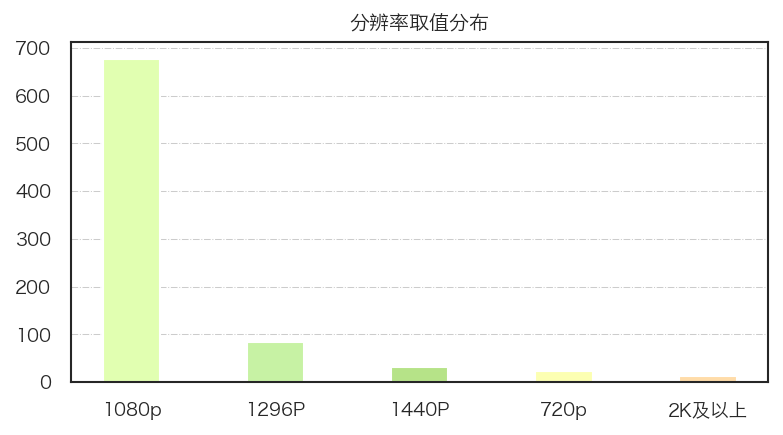

In [120]:
plt.bar(raw_data['image_resolution'].value_counts().keys(),
        raw_data['image_resolution'].value_counts().values,
        width= 0.4, color = color_3)
plt.title("分辨率取值分布")
plt.grid(linestyle='-.', axis='y', linewidth=.5)

In [121]:
image_map = {'720p' : 0, '1080p' : 1, '1296P' : 2,
             '1440P' : 3, '2K及以上' : 4}
raw_data['image_resolution'] = raw_data['image_resolution'].map(image_map)

### 安装方式属性处理

In [122]:
raw_data['install_mode'].isna().sum()

0

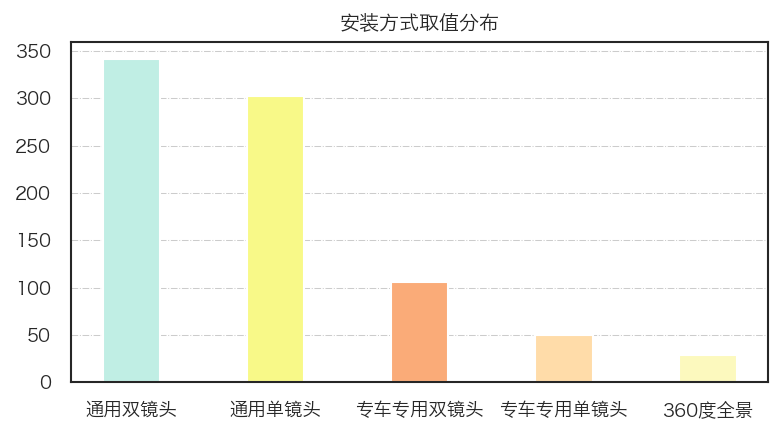

In [123]:
plt.bar(raw_data['install_mode'].value_counts().keys(),
        raw_data['install_mode'].value_counts().values,
        width= 0.4, color = color_1)
plt.title("安装方式取值分布")
plt.grid(linestyle='-.', axis='y', linewidth=.5)

In [124]:
# 独热位处理
raw_data = pd.get_dummies(raw_data, columns=['install_mode'], prefix="",drop_first=True)

### 产品毛重属性处理

In [125]:
raw_weight = raw_data['weight']
print(f"data number before dropna: {raw_weight.shape[0]}")
exist_price = raw_weight.dropna()
print(f"data number after dropna: {raw_weight.shape[0]}")
print(f"{raw_price.shape[0] - exist_price.shape[0]} data need process")

data number before dropna: 829
data number after dropna: 829
0 data need process


[  3000.   2300.  20000. 100000. 155000.   5000.   2600.   2500.   2790.
   2670.   3130.   3330.   3330.   3330.   3360.   3120.   2910.   3050.
   2750.  15000.   3060.   3410.   2870.   2790.   3010.   3420.   2970.
   2910.   3010.   3800.   2500.]


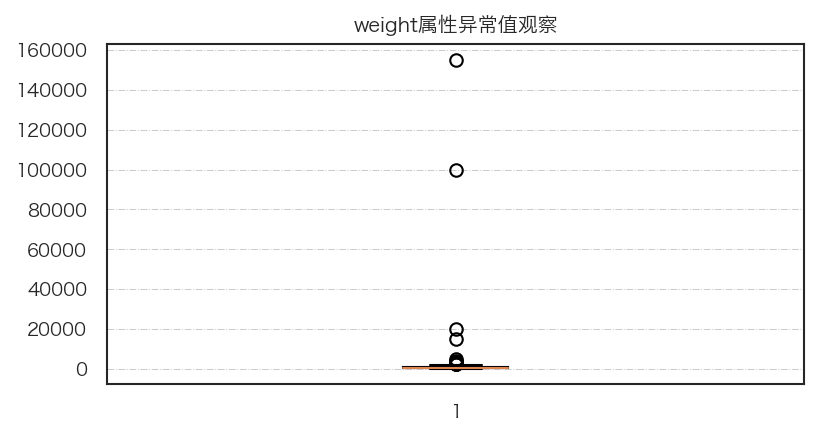

In [126]:
p = plt.boxplot(raw_data['weight'], patch_artist=color_3[0])
plt.title("weight属性异常值观察")
outlier = p['fliers'][0].get_ydata()
plt.grid(linestyle='-.', axis='y', linewidth=.5)
print(outlier)

In [127]:
raw_data.drop(index=raw_data[raw_data['weight'] > 2000].index, inplace=True)

[]


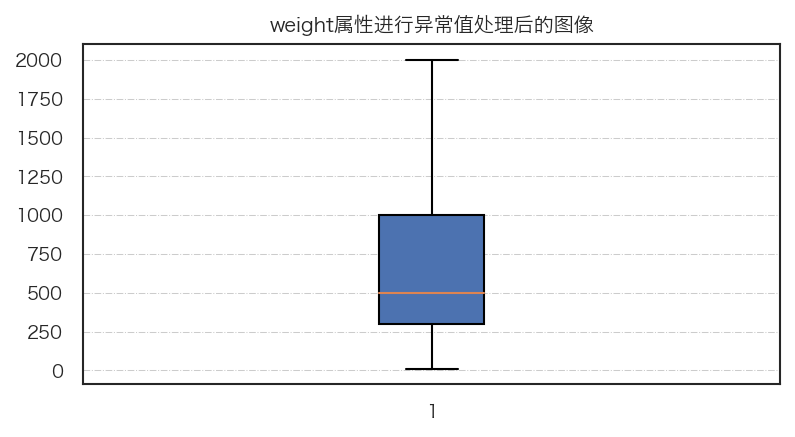

In [128]:
p = plt.boxplot(raw_data['weight'], patch_artist=color_3[0])
plt.title("weight属性进行异常值处理后的图像")
outlier = p['fliers'][0].get_ydata()
plt.grid(linestyle='-.', axis='y', linewidth=.5)
print(outlier)
original_weight = raw_data['weight']

In [129]:
# 使用K-Means聚类
raw_data['weight'] = KmeanCut(raw_data['weight'], 5)

Text(0, 0.5, 'count')

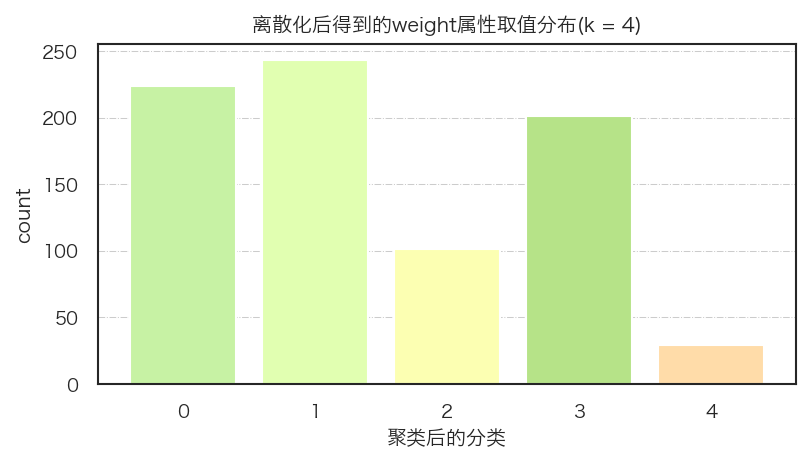

In [130]:
plt.bar(raw_data['weight'].value_counts().keys(),raw_data['weight'].value_counts().values,color = color_3)
plt.title("离散化后得到的weight属性取值分布(k = 4)")
plt.xlabel("聚类后的分类")
plt.grid(linestyle='-.', axis='y', linewidth=.5)
plt.ylabel("count")

### 取出price,comment的数值形数据

In [131]:
original_price = raw_data['original_price'].copy(deep=True)
original_comment = raw_data['original_comment'].copy(deep=True)

raw_data.drop(columns=['original_price'], inplace=True)
raw_data.drop(columns=['original_comment'],inplace=True)

original_comment

0        4200
1        3500
2       20000
3        9700
4        4100
        ...  
1794        4
1795      100
1797       20
1798        2
1799        2
Name: original_comment, Length: 798, dtype: int64

### 训练集,数据集分割

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = raw_data.drop(columns=['comment'])
Y = raw_data['comment']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=432, shuffle=True, stratify=Y)

### 数据平衡

In [134]:
from collections import Counter
print(Counter(y_train))

Counter({0: 474, 1: 71, 2: 13})


In [135]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [136]:
print(Counter(y_train))

Counter({0: 474, 1: 474, 2: 474})


In [137]:
X_train.shape
X_test.shape

(240, 22)

### 样本重要性评测

In [138]:
X_train['price'] = X_train['price'].astype(int)
X_train['weight'] = X_train['weight'].astype(int)

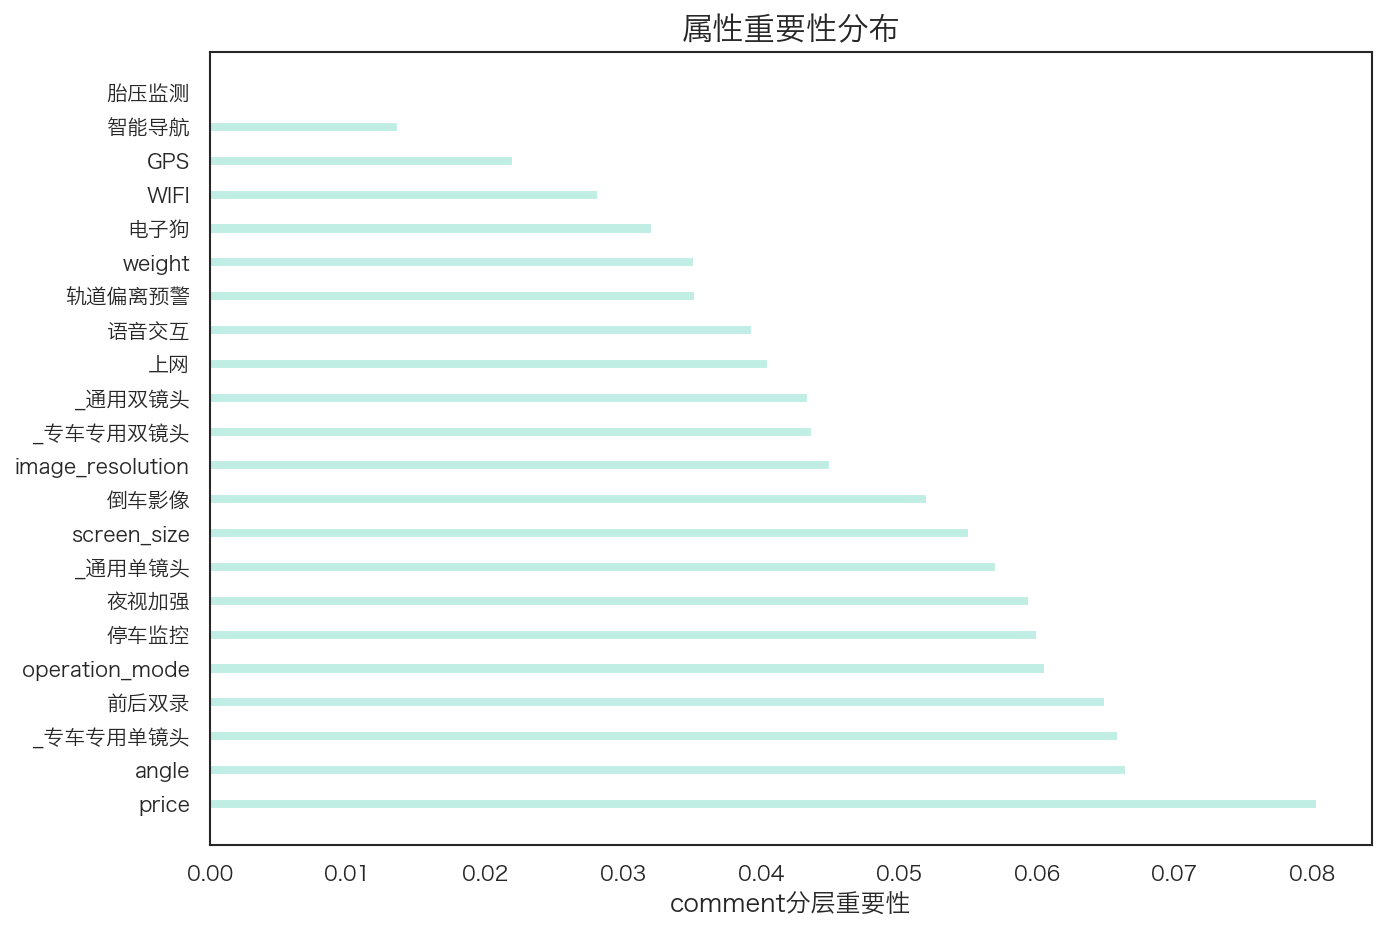

In [139]:
from xgboost import XGBClassifier
model = XGBClassifier()
model=model.fit(X_train, y_train)

view = pd.DataFrame({'importance':model.feature_importances_,'var':X.columns})
view = view.sort_values(by='importance',ascending=False)
view.head(10)

plt.figure(figsize = (10,7))
with sns.color_palette(color_1):
    plt.barh(view['var'],view['importance'], height = .3)
    plt.yticks(fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.xlabel('comment分层重要性', fontsize = 12)
    plt.title("属性重要性分布", fontsize = 15)

In [140]:
X_train.drop(columns=['weight'], inplace=True)
X_test.drop(columns=['weight'], inplace=True)

## 分类任务

In [141]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import *
from sklearn.decomposition import PCA

In [142]:
pca = PCA(n_components=10)
pca.fit(X_train, y_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train.shape
X_test.shape

(240, 10)

### 模型性能评估实现

In [228]:
scores = pd.DataFrame(columns=['name','accuracy','recall','precision','f1','roc_auc']) 

'function to evulate model & the container to save the results'
def evaluate(sample_test,label_test,model,name):
    outputs = model.predict(sample_test)
    outputs_proba = model.predict_proba(sample_test)
    accuracy = accuracy_score(label_test,outputs)
    recall = recall_score(label_test,outputs,average="weighted")
    f1 = f1_score(label_test,outputs,average="weighted")
    precision = precision_score(label_test,outputs,average="weighted")
    roc_score = roc_auc_score(label_test,outputs_proba,average="weighted",multi_class="ovo")
    scores.loc[len(scores.index)] = [name,accuracy,precision,recall,f1,roc_score]

### 无优化随机森林

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

In [145]:
evaluate(X_test,y_test,rf,"RandomForest")

In [146]:
scores

,name,accuracy,recall,precision,f1,roc_auc
0,RandomForest,0.766667,0.779373,0.766667,0.77226,0.553993


### 优化随机森林

In [147]:

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from sklearn.model_selection import cross_val_score

space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400, 500, 600]),
    "max_depth": hp.quniform("max_depth", 1, 15, 1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}
# 定义目标函数

def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X_train, y_train.values,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}


In [148]:
# 初始化Trial 对象
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo= tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [01:23<00:00,  1.20trial/s, best loss: -0.8586854460093896]
Best: {'criterion': 0, 'max_depth': 9.0, 'n_estimators': 5}


In [149]:
rf = RandomForestClassifier(n_estimators=600,max_depth=9,criterion="gini")
rf.fit(X_train,y_train)
evaluate(X_test,y_test,rf,"optimal_randomForest")

In [150]:
scores

,name,accuracy,recall,precision,f1,roc_auc
0,RandomForest,0.766667,0.779373,0.766667,0.772260,0.553993
1,optimal_randomForest,0.766667,0.782961,0.766667,0.774432,0.667928


### CART

In [151]:
cart_clf = DecisionTreeClassifier(criterion= "gini")
cart_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [152]:
evaluate(X_test,y_test,cart_clf,"CART")

### ID3

In [153]:
id3_clf = DecisionTreeClassifier(criterion= "entropy")
id3_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [154]:
evaluate(X_test,y_test,id3_clf,"ID3")
y_train_pred = id3_clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9226441631504922

In [155]:
scores

,name,accuracy,recall,precision,f1,roc_auc
0,RandomForest,0.766667,0.779373,0.766667,0.772260,0.553993
1,optimal_randomForest,0.766667,0.782961,0.766667,0.774432,0.667928
2,CART,0.687500,0.755850,0.687500,0.717388,0.543526
3,ID3,0.679167,0.772977,0.679167,0.716022,0.565619


### SVM

In [156]:
from sklearn.svm import SVC
svc = SVC(C=10,kernel='rbf',decision_function_shape='ovo',probability=True) 
svc.fit(X_train,y_train.ravel())

SVC(C=10, decision_function_shape='ovo', probability=True)

In [157]:
evaluate(X_test,y_test,svc,"SVC")

In [158]:
scores

,name,accuracy,recall,precision,f1,roc_auc
0,RandomForest,0.766667,0.779373,0.766667,0.772260,0.553993
1,optimal_randomForest,0.766667,0.782961,0.766667,0.774432,0.667928
2,CART,0.687500,0.755850,0.687500,0.717388,0.543526
3,ID3,0.679167,0.772977,0.679167,0.716022,0.565619
4,SVC,0.758333,0.808939,0.758333,0.779697,0.694377


### 神经网络

In [159]:
from sklearn.neural_network import MLPClassifier

classifier=MLPClassifier(activation='relu',max_iter=10000,hidden_layer_sizes=(30,))
classifier.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30,), max_iter=10000)

In [160]:
evaluate(X_test,y_test,classifier,"MLP")

In [161]:
scores

,name,accuracy,recall,precision,f1,roc_auc
0,RandomForest,0.766667,0.779373,0.766667,0.772260,0.553993
1,optimal_randomForest,0.766667,0.782961,0.766667,0.774432,0.667928
2,CART,0.687500,0.755850,0.687500,0.717388,0.543526
3,ID3,0.679167,0.772977,0.679167,0.716022,0.565619
4,SVC,0.758333,0.808939,0.758333,0.779697,0.694377
5,MLP,0.712500,0.785023,0.712500,0.741979,0.685886


### GBDT

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=100)
gbdt.fit(X_train,y_train)

GradientBoostingClassifier()

In [163]:
evaluate(X_test,y_test,gbdt,"GBDT")

In [164]:
scores

,name,accuracy,recall,precision,f1,roc_auc
0,RandomForest,0.766667,0.779373,0.766667,0.772260,0.553993
1,optimal_randomForest,0.766667,0.782961,0.766667,0.774432,0.667928
2,CART,0.687500,0.755850,0.687500,0.717388,0.543526
3,ID3,0.679167,0.772977,0.679167,0.716022,0.565619
4,SVC,0.758333,0.808939,0.758333,0.779697,0.694377
5,MLP,0.712500,0.785023,0.712500,0.741979,0.685886
6,GBDT,0.745833,0.782740,0.745833,0.761905,0.680809


### XGB

In [165]:
model = XGBClassifier()
model= model.fit(X_train, y_train)

In [166]:
evaluate(X_test,y_test,model,"XGB")

In [167]:
scores

,name,accuracy,recall,precision,f1,roc_auc
0,RandomForest,0.766667,0.779373,0.766667,0.772260,0.553993
1,optimal_randomForest,0.766667,0.782961,0.766667,0.774432,0.667928
2,CART,0.687500,0.755850,0.687500,0.717388,0.543526
3,ID3,0.679167,0.772977,0.679167,0.716022,0.565619
4,SVC,0.758333,0.808939,0.758333,0.779697,0.694377
5,MLP,0.712500,0.785023,0.712500,0.741979,0.685886
6,GBDT,0.745833,0.782740,0.745833,0.761905,0.680809
7,XGB,0.766667,0.779373,0.766667,0.772260,0.631047


### Bayes

In [168]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train) 

GaussianNB()

In [169]:
evaluate(X_test,y_test,clf,"Bayes")

In [227]:
scores.style.highlight_max()

,name,accuracy,recall,precision,f1,roc_auc
0,RandomForest,0.766667,0.779373,0.766667,0.772260,0.553993
1,optimal_randomForest,0.766667,0.782961,0.766667,0.774432,0.667928
2,CART,0.687500,0.755850,0.687500,0.717388,0.543526
3,ID3,0.679167,0.772977,0.679167,0.716022,0.565619
4,SVC,0.758333,0.808939,0.758333,0.779697,0.694377
5,MLP,0.712500,0.785023,0.712500,0.741979,0.685886
6,GBDT,0.745833,0.782740,0.745833,0.761905,0.680809
7,XGB,0.766667,0.779373,0.766667,0.772260,0.631047
8,Bayes,0.645833,0.782495,0.645833,0.694489,0.707757


## 聚类任务

### 数据降维与可视化

In [232]:
X = raw_data.drop(columns=['comment'])
Y = raw_data['comment']
pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)
X_2.shape

(798, 2)

Text(0.5, 1.0, 'PCA降维后的数据分布')

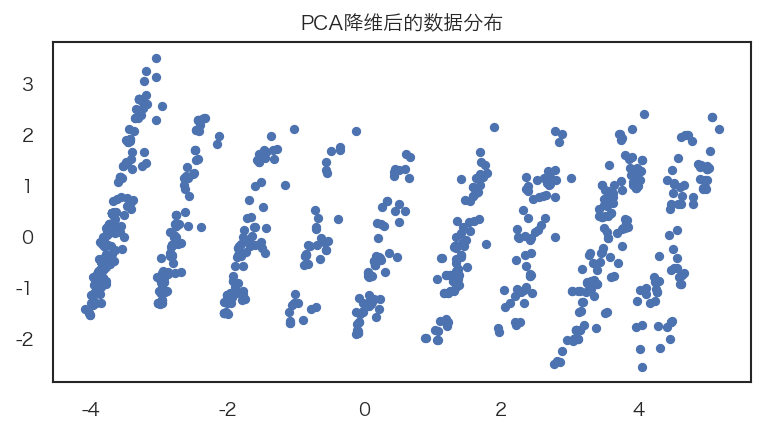

In [233]:
plt.scatter(X_2[:,0], X_2[:,1],s=12)
plt.title("PCA降维后的数据分布")

### 聚类算法使用与结果测评

In [234]:
kmeans = KMeans(n_clusters=4)
y_kmeans_4 = kmeans.fit_predict(X)

Counter(y_kmeans_4)

Counter({3: 204, 1: 254, 0: 240, 2: 100})

Text(0.5, 1.0, '使用KMeans(k = 4)时的聚类结果')

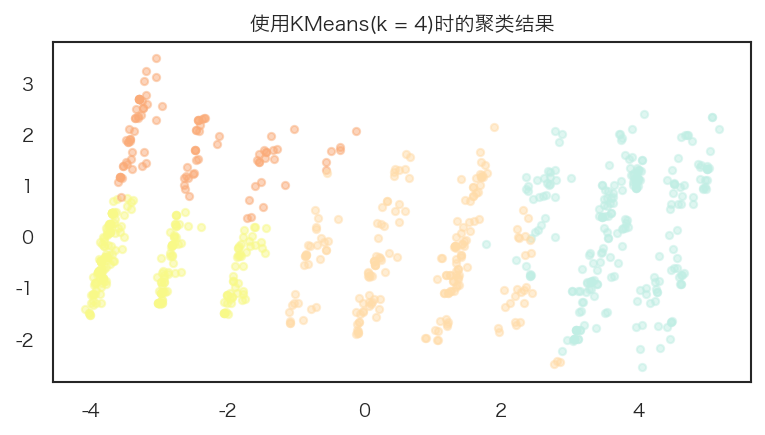

In [235]:
plt.scatter(X_2[y_kmeans_4 == 0,0], X_2[y_kmeans_4 == 0,1],s=12,c=color_1[0],alpha=0.5)
plt.scatter(X_2[y_kmeans_4== 1,0], X_2[y_kmeans_4 == 1,1],s=12,c=color_1[1],alpha=0.5)
plt.scatter(X_2[y_kmeans_4 == 2,0], X_2[y_kmeans_4 == 2,1],s=12,c=color_1[2],alpha=0.5)
plt.scatter(X_2[y_kmeans_4 == 3,0], X_2[y_kmeans_4 == 3,1],s=12,c=color_1[3],alpha=0.5)
plt.title("使用KMeans(k = 4)时的聚类结果")

Text(0.5, 1.0, '使用KMeans(k = 5)时的聚类结果')

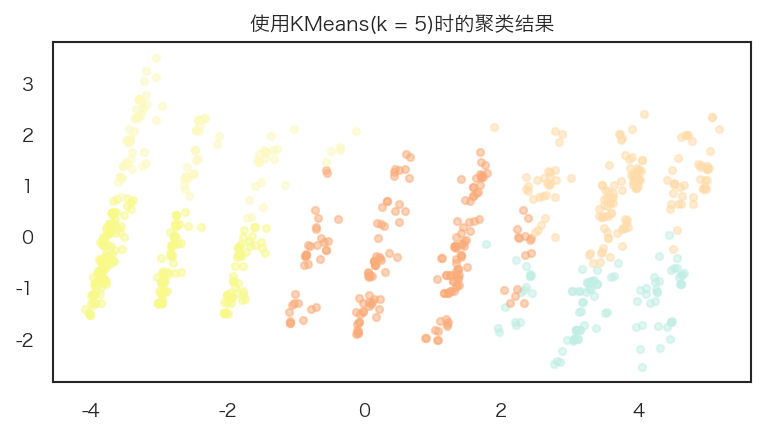

In [236]:
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(X)

Counter(y)
plt.scatter(X_2[y == 0,0], X_2[y == 0,1],s=12,c=color_1[0],alpha=0.5)
plt.scatter(X_2[y == 1,0], X_2[y == 1,1],s=12,c=color_1[1],alpha=0.5)
plt.scatter(X_2[y == 2,0], X_2[y == 2,1],s=12,c=color_1[2],alpha=0.5)
plt.scatter(X_2[y == 3,0], X_2[y == 3,1],s=12,c=color_1[3],alpha=0.5)
plt.scatter(X_2[y == 4,0], X_2[y == 4,1],s=12,c=color_1[4],alpha=0.5)
plt.title("使用KMeans(k = 5)时的聚类结果")


In [176]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
y = dbscan.fit_predict(X)

In [177]:
Counter(y)

Counter({0: 755, -1: 26, 1: 2, 2: 3, 3: 2, 4: 2, 5: 4, 6: 4})

Text(0.5, 1.0, '使用DBSCAN时的聚类结果')

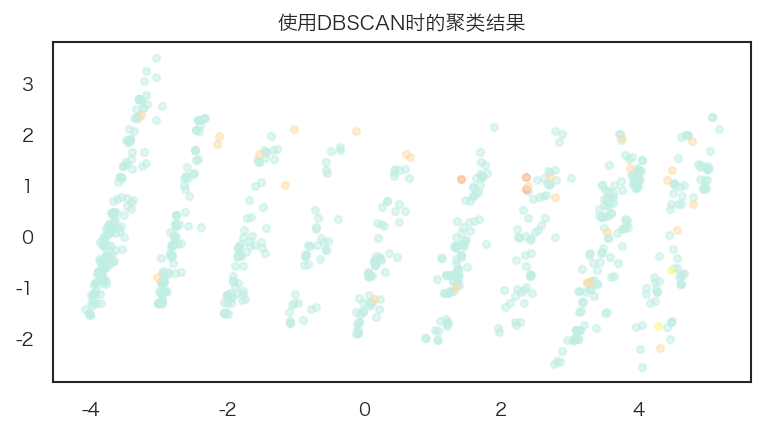

In [178]:
plt.scatter(X_2[y == 0,0], X_2[y == 0,1],s=12,c=color_1[0],alpha=0.5)
plt.scatter(X_2[y == 1,0], X_2[y == 1,1],s=12,c=color_1[1],alpha=0.5)
plt.scatter(X_2[y == 2,0], X_2[y == 2,1],s=12,c=color_1[2],alpha=0.5)
plt.scatter(X_2[y == -1,0], X_2[y == -1,1],s=12,c=color_1[3],alpha=0.5)
plt.title("使用DBSCAN时的聚类结果")

### 聚类结果分析(Kmeans, k = 4)

In [179]:
y = y_kmeans_4
Counter(y)

Counter({1: 199, 2: 254, 3: 246, 0: 99})

In [180]:
def show_character(column):
    key = raw_data[column].value_counts().keys()
    key = pd.unique(key)
    x = key.astype(int)
    width = 0.15
    
    plt.figure()
    plt.bar(x - width, X[y == 0][column].value_counts().values,label = "class0",width=width,color = color_1[0])
    plt.bar(x, X[y == 1][column].value_counts().values,label = "class1",width=width,color = color_1[3])
    plt.bar(x + 1 * width, X[y == 2][column].value_counts().values,label = "class2",width=width,color = color_1[2])
    plt.bar(x + 2 * width, X[y == 3][column].value_counts().values,label = "class3",width=width,color = color_1[1])
    plt.xticks(key)
    plt.grid(linestyle='-.', axis='y', linewidth=.5)
    plt.legend(fontsize = 6)
    plt.title(f"聚类结果与{column}属性的关系分析")

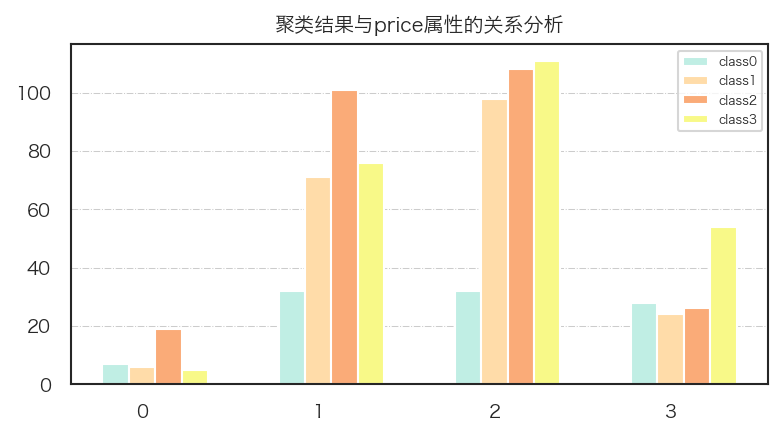

In [181]:
# 与价格的关系
show_character('price')

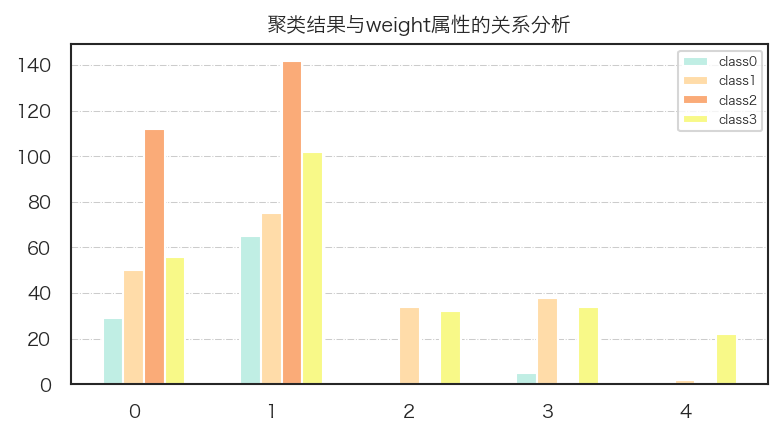

In [182]:
show_character('weight')

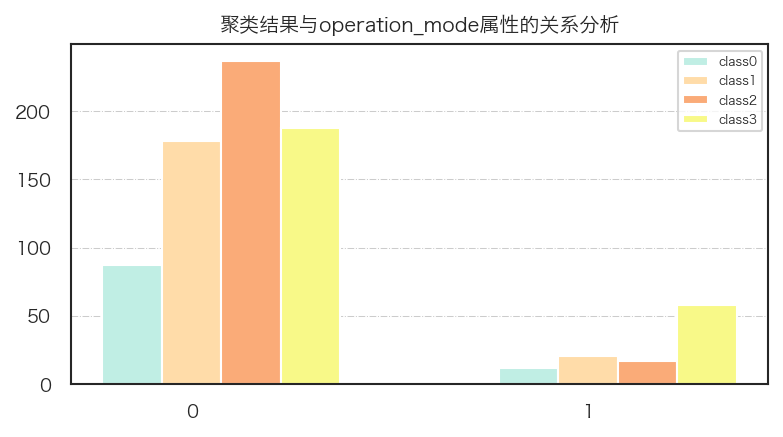

In [183]:
show_character('operation_mode')

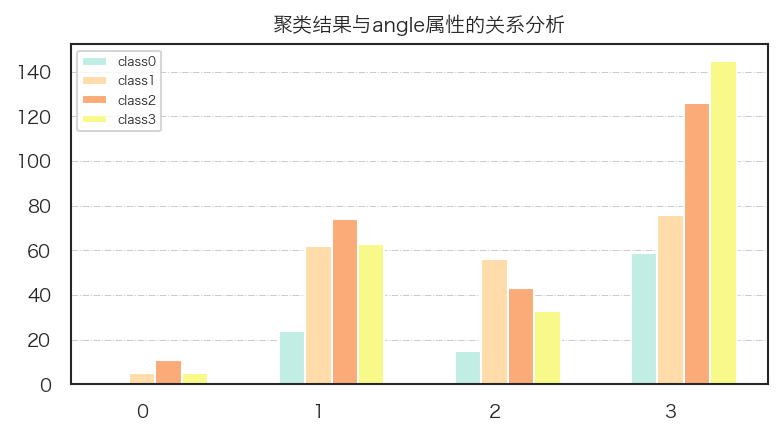

In [184]:
show_character('angle')

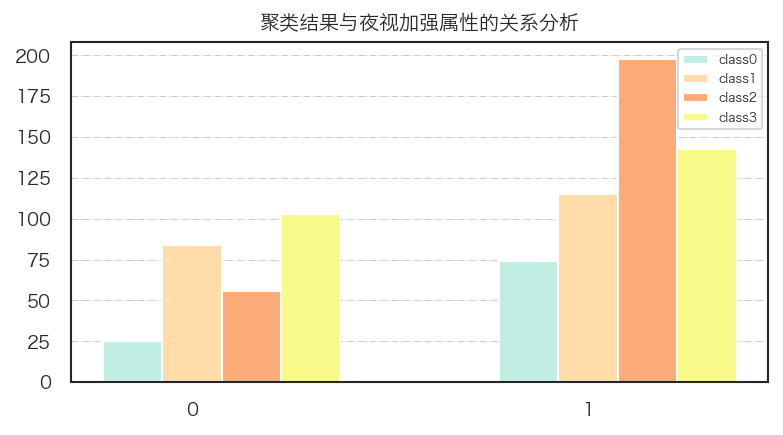

In [185]:
show_character('夜视加强')

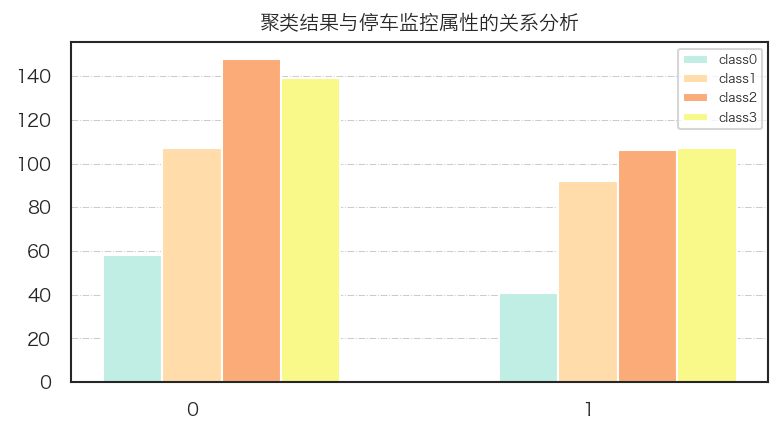

In [186]:
show_character('停车监控')

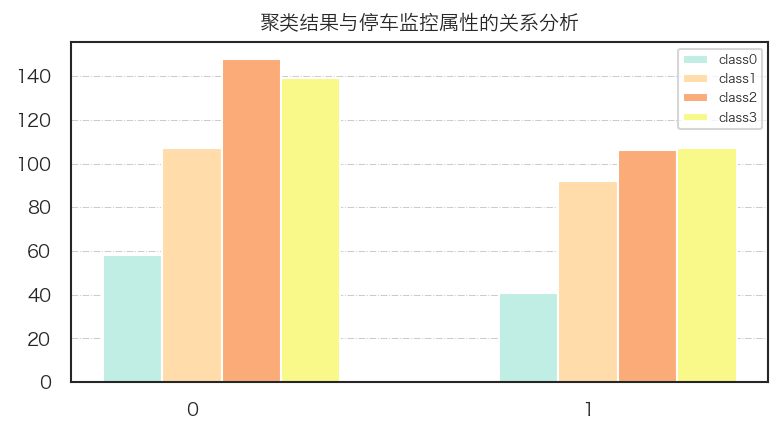

In [187]:
show_character('停车监控')

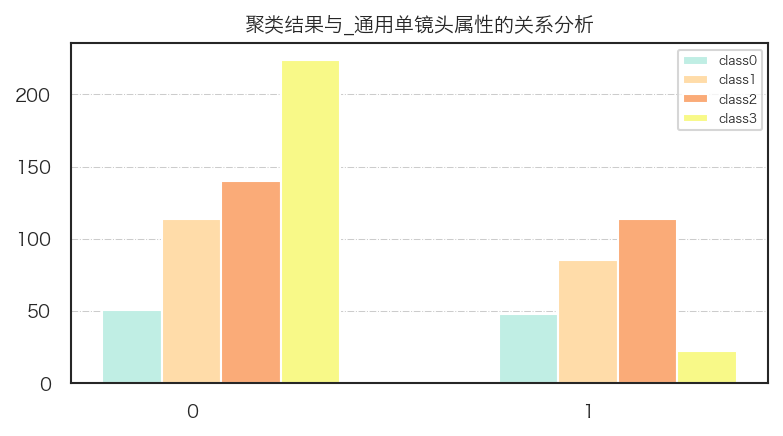

In [188]:
show_character('_通用单镜头')

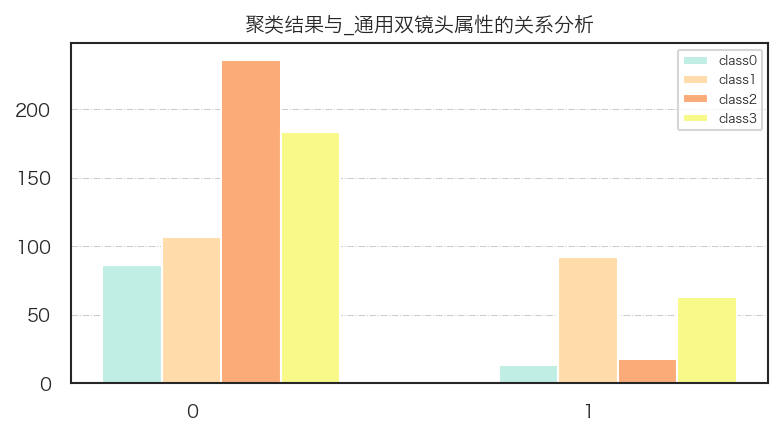

In [189]:
show_character('_通用双镜头')

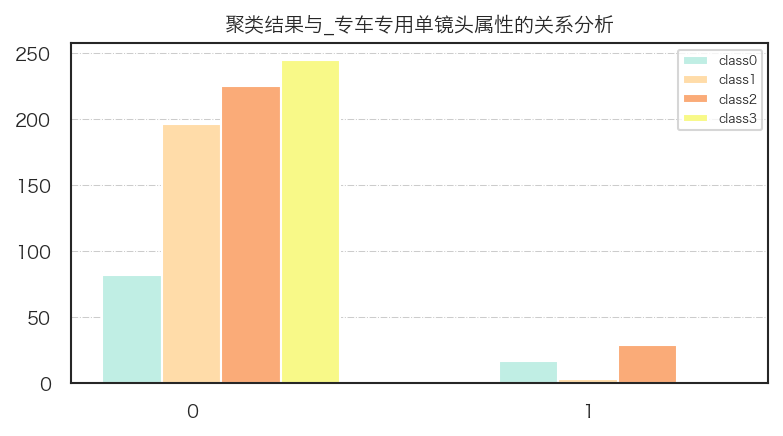

In [190]:
show_character('_专车专用单镜头')

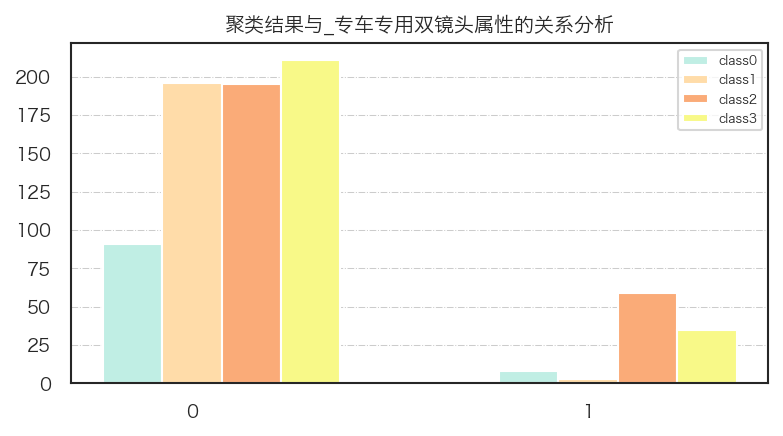

In [191]:
show_character('_专车专用双镜头')

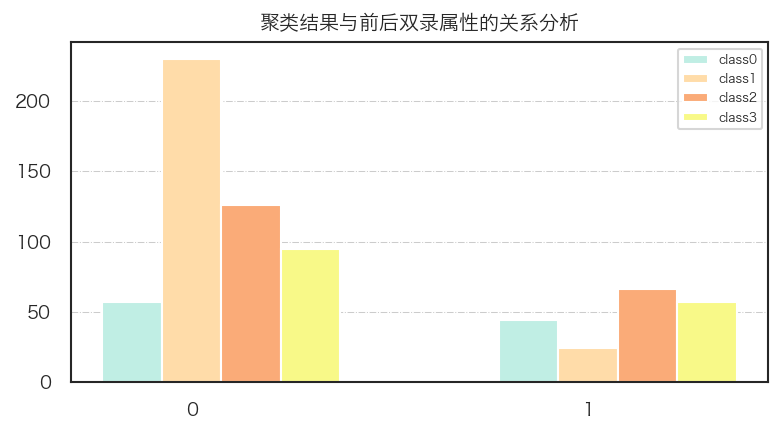

In [237]:
show_character('前后双录')

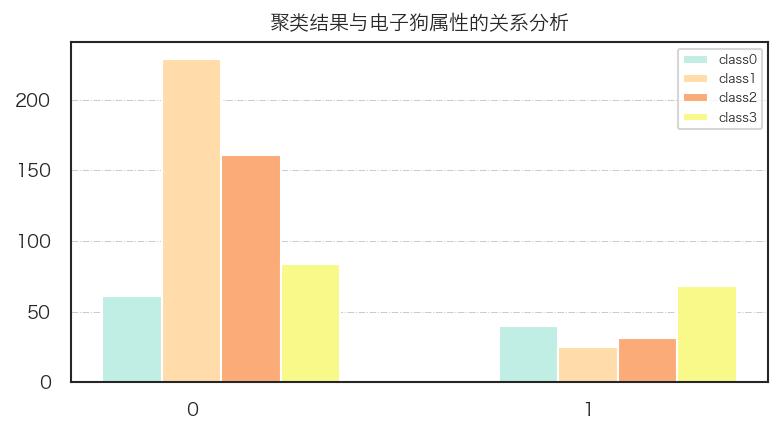

In [238]:
show_character('电子狗')

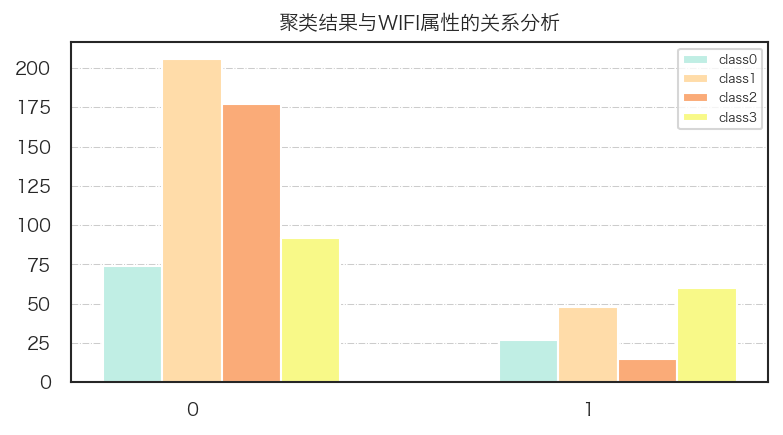

In [239]:
show_character('WIFI')

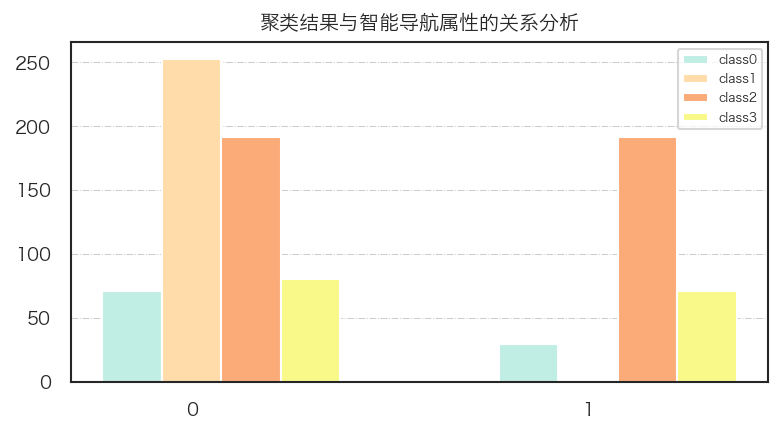

In [241]:
show_character('智能导航')

In [192]:
X.columns

Index(['price', 'operation_mode', 'screen_size', 'angle', 'image_resolution',
       'weight', '夜视加强', '停车监控', '前后双录', '语音交互', 'WIFI', '轨道偏离预警', '倒车影像',
       'GPS', '上网', '智能导航', '电子狗', '胎压监测', '_专车专用单镜头', '_专车专用双镜头', '_通用单镜头',
       '_通用双镜头'],
      dtype='object')

## 关联分析

In [193]:
from mlxtend.frequent_patterns import apriori

In [194]:
# 数据处理
data = raw_data.copy(deep=True)
data = pd.get_dummies(data, columns=['price','operation_mode','screen_size','angle','image_resolution','weight'],drop_first=True)
data['comment'] = original_comment
data = data[data['comment'] > 0]

data_pro=pd.DataFrame()
for i in range(data.shape[0]):
    data_temp=pd.DataFrame(np.repeat(pd.DataFrame(data.iloc[i]).T.values,data.iloc[i]["comment"],axis=0))
    data_temp.columns=pd.DataFrame(data.iloc[i]).T.columns
    data_pro=pd.concat([data_pro,data_temp])


In [195]:
original_comment.shape

(798,)

In [196]:
data_final =  data_pro.drop(columns=['comment'])
data_final = data_final.astype(bool)

In [197]:
frequent = apriori(data_final,min_support=0.15,use_colnames=True).sort_values(by='support', ascending=False)

In [198]:
frequent

,support,itemsets
14,0.846209,(image_resolution_1)
7,0.571732,(price_1)
0,0.571247,(夜视加强)
6,0.508891,(_通用双镜头)
26,0.488300,"(夜视加强, image_resolution_1)"
...,...,...
37,0.151646,"(weight_1, 停车监控)"
92,0.151334,"(image_resolution_1, screen_size_7, 停车监控)"
75,0.151035,"(price_1, 夜视加强, _通用单镜头)"
103,0.150925,"(angle_1, _通用双镜头, image_resolution_1)"


In [242]:
from mlxtend.frequent_patterns import association_rules
rule = association_rules(frequent, metric='confidence', min_threshold=0.8)
rule.sort_values(by='leverage', ascending=False, inplace=True)  	
rule[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(倒车影像),(前后双录),0.197925,0.263593,0.187201,0.945822,3.588189,0.135030,13.592393
49,(倒车影像),"(前后双录, 停车监控)",0.197925,0.203195,0.170358,0.860723,4.235934,0.130141,5.720988
48,"(前后双录, 停车监控)",(倒车影像),0.203195,0.197925,0.170358,0.838395,4.235934,0.130141,4.963197
47,"(倒车影像, 停车监控)",(前后双录),0.171818,0.263593,0.170358,0.991504,3.761493,0.125068,86.676454
44,(倒车影像),"(前后双录, _通用双镜头)",0.197925,0.233438,0.170994,0.863937,3.700924,0.124791,5.633870
43,"(倒车影像, _通用双镜头)",(前后双录),0.175845,0.263593,0.170994,0.972414,3.689073,0.124643,26.695321
52,(倒车影像),"(前后双录, image_resolution_1)",0.197925,0.234065,0.169264,0.855195,3.653659,0.122937,5.289416
51,"(倒车影像, image_resolution_1)",(前后双录),0.178325,0.263593,0.169264,0.949189,3.600962,0.122259,14.493066
81,"(前后双录, _通用双镜头, 停车监控)",(倒车影像),0.173056,0.197925,0.154151,0.890760,4.500505,0.119899,7.342356
72,"(停车监控, 前后双录, image_resolution_1)",(倒车影像),0.181979,0.197925,0.155594,0.855012,4.319889,0.119576,5.532023


In [243]:
rule[10:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
73,"(倒车影像, image_resolution_1)","(前后双录, 停车监控)",0.178325,0.203195,0.155594,0.872532,4.294052,0.119359,6.251011
83,"(倒车影像, _通用双镜头)","(前后双录, 停车监控)",0.175845,0.203195,0.154151,0.876630,4.314218,0.118420,6.458635
75,"(倒车影像, 停车监控)","(前后双录, image_resolution_1)",0.171818,0.234065,0.155594,0.905576,3.868904,0.115378,8.111660
65,"(倒车影像, _通用双镜头)","(前后双录, image_resolution_1)",0.175845,0.234065,0.156049,0.887423,3.791349,0.114890,6.803664
70,"(倒车影像, 停车监控, image_resolution_1)",(前后双录),0.155845,0.263593,0.155594,0.998390,3.787618,0.114515,457.503824
66,"(倒车影像, image_resolution_1)","(前后双录, _通用双镜头)",0.178325,0.233438,0.156049,0.875083,3.748670,0.114421,6.136551
84,"(倒车影像, 停车监控)","(前后双录, _通用双镜头)",0.171818,0.233438,0.154151,0.897177,3.843317,0.114042,7.455143
63,"(倒车影像, _通用双镜头, image_resolution_1)",(前后双录),0.160447,0.263593,0.156049,0.972592,3.689748,0.113756,26.868726
80,"(倒车影像, _通用双镜头, 停车监控)",(前后双录),0.154272,0.263593,0.154151,0.999216,3.790752,0.113486,939.737941
87,"(电子狗, 停车监控)",(前后双录),0.160182,0.263593,0.152338,0.951028,3.607940,0.110115,15.037396


## 回归分析

In [200]:
from pandas import DataFrame as DF
from sklearn import ensemble
from sklearn import svm

### price

In [253]:
X = original_price
y = original_comment
X = X.apply(lambda x : pow(10,x))

In [254]:
from sklearn.linear_model import LinearRegression
from pandas import DataFrame as DF
linear = LinearRegression()
linear.fit(DF(X),DF(y))

LinearRegression()

([<matplotlib.axis.XTick at 0x28dc0fd60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

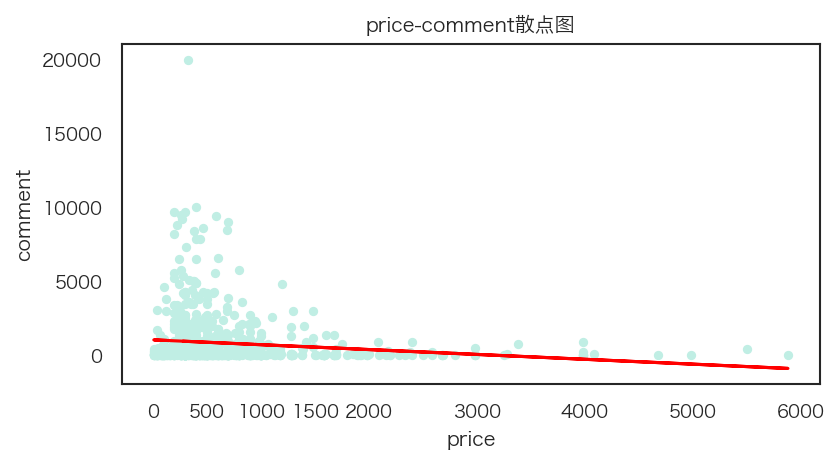

In [256]:
plt.scatter(x=X,y=y,c=color_1[0],s=12)
plt.plot(X,linear.predict(DF(X)),color = 'red',linewidth = 1.5)
plt.title('price-comment散点图')
plt.xlabel('price')
plt.ylabel('comment')
plt.xticks([0,500,1000,1500,2000,3000,4000,5000,6000])

### weight

In [258]:
X = original_weight
y = original_comment

In [259]:
linear = LinearRegression()
linear.fit(DF(X),DF(y))

LinearRegression()

Text(0, 0.5, 'comment')

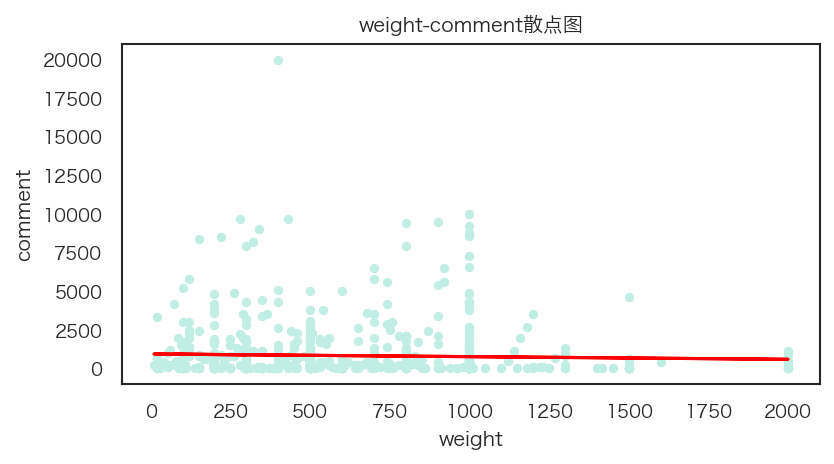

In [260]:
plt.scatter(x=X,y=y,c=color_1[0],s=12)
plt.plot(X,linear.predict(DF(X)),color = 'red',linewidth = 1.5)
plt.title('weight-comment散点图')
plt.xlabel('weight')
plt.ylabel('comment')

### screen_size

In [262]:
X = raw_data['screen_size']
y = original_comment

In [263]:
linear = LinearRegression()
linear.fit(DF(X),DF(y))

LinearRegression()

Text(0, 0.5, 'comment')

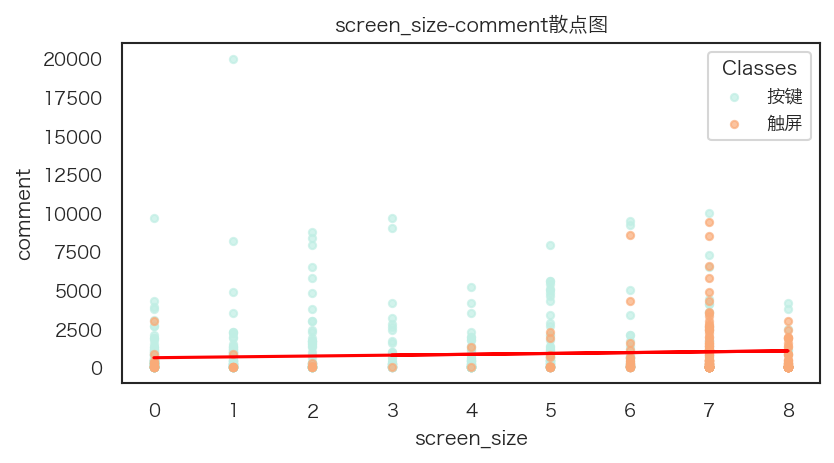

In [273]:
plt.scatter(x=X[raw_data['operation_mode'] == 0],y=y[raw_data['operation_mode'] == 0],c=color_1[0],alpha=0.7,s=12)
plt.scatter(x=X[raw_data['operation_mode'] == 1],y=y[raw_data['operation_mode'] == 1],c=color_1[2],alpha=0.7,s=12)
plt.legend(["按键","触屏"], title="Classes")
plt.plot(X,linear.predict(DF(X)),color = 'red',linewidth = 1.5)
plt.title('screen_size-comment散点图')
plt.xlabel('screen_size')
plt.ylabel('comment')

### image_resolution

In [278]:
X = raw_data['image_resolution']
y = original_comment

In [279]:
linear = LinearRegression()
linear.fit(DF(X),DF(y))

LinearRegression()

([<matplotlib.axis.XTick at 0x28e3907f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

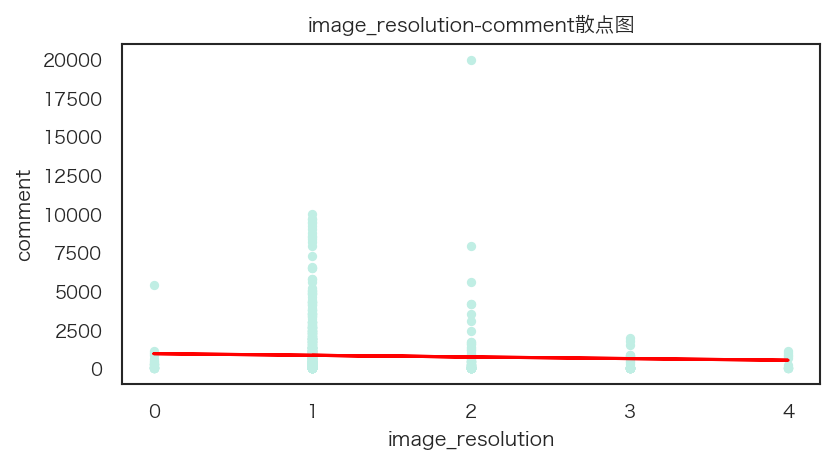

In [281]:
plt.scatter(x=X,y=y,c=color_1[0],s=12)
plt.plot(X,linear.predict(DF(X)),color = 'red',linewidth = 1.5)
plt.title('image_resolution-comment散点图')
plt.xlabel('image_resolution')
plt.ylabel('comment')
plt.xticks([0,1,2,3,4])